# Analyze basin fractions and number of attractors

import data

In [1]:
import torch
import mat73
import matplotlib.pyplot as plt
from pathlib import Path

import matplotlib
matplotlib.rcParams.update({'font.size': 11})

In [2]:
loadEGC = mat73.loadmat("./data/att_EGC.mat")
EGC = torch.tensor(loadEGC["egc"]).type('torch.FloatTensor')

num_rho, num_samp = EGC.size()
Ns = 12
Nr = 12

Results = torch.zeros(num_rho, num_samp, 6)
# last dimension: [0] whether full coexisting is stable
# number of attractors ([1] stable, [2] fluc)
# basin fractions ([3] global stable, [4] alt stable, [5] fluc)
datapath = "./data/att_Jul10/"

for i in range(num_rho):
    loadO = mat73.loadmat(datapath+"att_RCM"+str(i)+".mat")
    Results[i] = torch.tensor(loadO["outputs"]).type('torch.FloatTensor')


Results[:,:,3][(Results[:,:,1] > 10) | (Results[:,:,2] > 4)] = 1.0
Results[:,:,4][(Results[:,:,1] > 10) | (Results[:,:,2] > 4)] = 0.0
Results[:,:,5][(Results[:,:,1] > 10) | (Results[:,:,2] > 4)] = 0.0

Results[:,:,1][Results[:,:,1] > 10] = 1.0
Results[:,:,2][Results[:,:,2] > 4] = 0.0

## Number of attarctors

Text(0, 0.5, '# of stable attractors')

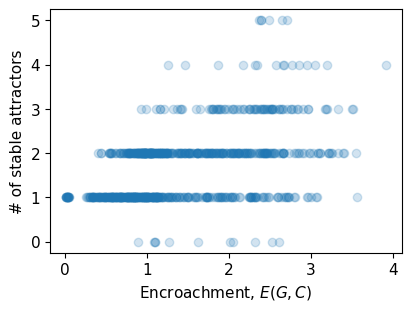

In [3]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(EGC,Results[:,:,1], alpha=0.2) # x: E;

#plt.ylim(0,10)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('# of stable attractors')

In [4]:
import math

In [5]:
E_mean = []
E_std = []

ns_mean = []
ns_std = []

nf_mean = []
nf_std = []

for i in range(35):
    indeces = ((i*0.1<=EGC) & (EGC<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = Results[:,:,1][indeces]
    y1_group = Results[:,:,2][indeces]
    if x_group.size() != torch.Size([0]):
        E_mean.append(torch.mean(x_group))
        E_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        ns_mean.append(torch.mean(y_group))
        ns_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))
        nf_mean.append(torch.mean(y1_group))
        nf_std.append(torch.std(y1_group)/math.sqrt(len(indeces[0])))

In [6]:
from scipy.io import loadmat
loadBF = loadmat("./data/bruteforce.mat")
x_mean = loadBF['x_mean'][0] * 2
y_mean = loadBF['y_mean'][0]
x_std = loadBF['x_std'][0]
y_std = loadBF['y_std'][0]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


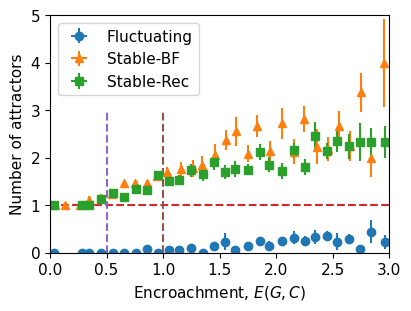

In [7]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(E_mean,nf_mean, xerr=E_std, yerr= nf_std, marker = 'o', ls='none')
plt.errorbar(x_mean,y_mean, xerr=x_std, yerr= y_std, marker = '^', ls='none')
plt.errorbar(E_mean,ns_mean, xerr=E_std, yerr= ns_std, marker = 's', ls='none')

plt.legend(['Fluctuating', 'Stable-BF','Stable-Rec'], loc='upper left')

plt.plot(torch.linspace(0,3.5,steps=10),torch.linspace(1.0,1.0,steps=10),'--')
plt.plot(torch.linspace(0.5,0.5,steps=10),torch.linspace(0,3.,steps=10),'--')
plt.plot(torch.linspace(1.0,1.0,steps=10),torch.linspace(0,3.,steps=10),'--')

plt.xlim(.0,3.0)
plt.ylim(.0,5.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Number of attractors')
plt.savefig("../../figures/FigS4emb7.eps", format = "eps")

## Fully coexisting alt stable states

In [8]:
FCAltSS = ((Results[:,:,0] == 1.0) & (Results[:,:,1] + Results[:,:,2] > 1.0)).nonzero(as_tuple=True)

Text(0, 0.5, '# of attractors')

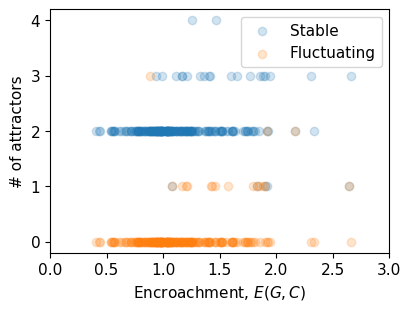

In [9]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(EGC[FCAltSS],Results[:,:,1][FCAltSS], alpha=0.2) # x: E;
plt.scatter(EGC[FCAltSS],Results[:,:,2][FCAltSS], alpha=0.2) # x: E;
plt.legend(['Stable','Fluctuating'])
plt.xlim(0,3.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('# of attractors')

Let's see if the alternative stable communities before E reaches 1 have fully coexisting fixed points.

In [10]:
# # of alternative stable communities before E reaches 1 have fully coexisting fixed points
len(((Results[:,:,0] == 1.0) & (Results[:,:,1] + Results[:,:,2] > 1.0) & (EGC <= 1.0))[0])

16

In [11]:
# # of alternative stable communities before E reaches 1
len(((Results[:,:,1] + Results[:,:,2] > 1.0) & (EGC <= 1.0))[0])

16

## Basin fractions

In [12]:
E_mean = []
E_std = []

gs1_mean = [] # fully coexisting and globally stable
gs1_std = []
full_gs = ((Results[:,:,3] == 1.0) & (Results[:,:,0] == 1.0)).float()
part_gs = ((Results[:,:,3] == 1.0) & (Results[:,:,0] != 1.0)).float()

gs2_std = []
gs2_mean = []

as_mean = []
as_std = []

fl_mean = []
fl_std = []

for i in range(35):
    indeces = ((i*0.1<=EGC) & (EGC<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = full_gs[indeces]
    y3_group = part_gs[indeces]
    y1_group = Results[:,:,4][indeces]
    y2_group = Results[:,:,5][indeces]
    if x_group.size() != torch.Size([0]):
        E_mean.append(torch.mean(x_group))
        E_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        gs1_mean.append(torch.mean(y_group))
        gs1_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))
        gs2_mean.append(torch.mean(y3_group))
        gs2_std.append(torch.std(y3_group)/math.sqrt(len(indeces[0])))
        as_mean.append(torch.mean(y1_group))
        as_std.append(torch.std(y1_group)/math.sqrt(len(indeces[0])))
        fl_mean.append(torch.mean(y2_group))
        fl_std.append(torch.std(y2_group)/math.sqrt(len(indeces[0])))

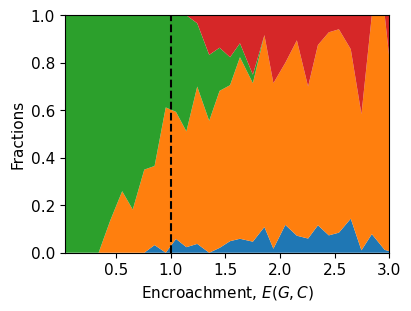

In [13]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.stackplot(E_mean,fl_mean, as_mean, gs1_mean, gs2_mean)
plt.plot(torch.linspace(1, 1, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')


plt.ylim(0,1)
#plt.xlim(E_mean[0],E_mean[-1])
plt.xlim(E_mean[0],3.0)

plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fractions')
plt.savefig("../../figures/FigS4emb8.eps", format = "eps")